# NSD Data Loader

This script illustrates usage of the NSD Data Loader Class.
For this class to work as intended nsd_access should be installed: https://github.com/tknapen/nsd_access
Both nsd_access and the data loader expect nsd data to be available in the original folder structure.

In [1]:
from nsdloader import NSDLoader
import os.path as op 

In [2]:
nsdfolder = op.join("..", "nsd") # adjust this to point to local copy of nsd dataset

nsdl = NSDLoader(nsdfolder)

Print a summary of the locally available data. This function will only show participants for which local data is available. It does so by checking for which participants beta data folders exist in the folder structure. It will therefore not catch whether data for all sessions has been downloaded. The number of available trials is read in from the behaviour data for each participant. The function returns a dictionary with each available subject as key and as value another dictionary of the form (Session: #Trials)

In [3]:
nsdl.get_data_info(verbose=True)

subj02
40 sessions available
30000 trials available
subj01
40 sessions available
30000 trials available


{'subj02': {1: 750,
  2: 750,
  3: 750,
  4: 750,
  5: 750,
  6: 750,
  7: 750,
  8: 750,
  9: 750,
  10: 750,
  11: 750,
  12: 750,
  13: 750,
  14: 750,
  15: 750,
  16: 750,
  17: 750,
  18: 750,
  19: 750,
  20: 750,
  21: 750,
  22: 750,
  23: 750,
  24: 750,
  25: 750,
  26: 750,
  27: 750,
  28: 750,
  29: 750,
  30: 750,
  31: 750,
  32: 750,
  33: 750,
  34: 750,
  35: 750,
  36: 750,
  37: 750,
  38: 750,
  39: 750,
  40: 750},
 'subj01': {1: 750,
  2: 750,
  3: 750,
  4: 750,
  5: 750,
  6: 750,
  7: 750,
  8: 750,
  9: 750,
  10: 750,
  11: 750,
  12: 750,
  13: 750,
  14: 750,
  15: 750,
  16: 750,
  17: 750,
  18: 750,
  19: 750,
  20: 750,
  21: 750,
  22: 750,
  23: 750,
  24: 750,
  25: 750,
  26: 750,
  27: 750,
  28: 750,
  29: 750,
  30: 750,
  31: 750,
  32: 750,
  33: 750,
  34: 750,
  35: 750,
  36: 750,
  37: 750,
  38: 750,
  39: 750,
  40: 750}}

Before loading the data, split it into training and test sets. The split is computed so that stimuli should only occur either in the training or the test set. (All repetitions of the same stimulus end up in the same set). The function accepts the approximate fraction of data to be held out for testing as test_fraction. Optionally only include stimuli that were shown to all participants

In [4]:
train_stims, test_stims = nsdl.create_image_split(test_fraction=.2, subset="shared", participant="subj01")
print(train_stims.shape)
print(test_stims.shape)
print(test_stims)   # pandas dataframe containing the stimulus ids 
                    # (cocoID to retrieve captions, 73KIDs used to get images and betas)


filtering dataset for : subject1
number of stimuli available for subject1: 10000
after filtering for: shared, 1000 stimuli are available
(800, 2)
(200, 2)
       cocoId  ID73K
62006  122923  62007
59420  298139  59421
52527  438751  52528
20080   51774  20081
52652  439241  52653
...       ...    ...
68023  498615  68024
67829  497797  67830
52554  176728  52555
33245  100863  33246
55649  188660  55650

[200 rows x 2 columns]


Next, retrieve all trials in which the selected stimuli were shown, for all subjects specified.

In [5]:
trialdata_train = nsdl.trials_for_stim(['subj01', 'subj02'], train_stims)
trialdata_test = nsdl.trials_for_stim(['subj01', 'subj02'], test_stims)
trialdata_train # for subjects that completed all 30000 trials 
                # each stimulus was shown three times, for two subjects this amounts to
                # 800 * 3 * 2 = 4800 trials in the training set with shared images

,SUBJECT,SESSION,RUN,TRIAL,73KID
28,1,1,1,29,48618
35,1,1,1,36,44981
44,1,1,1,45,32626
55,1,1,1,56,53053
56,1,1,1,57,4931
...,...,...,...,...,...
29929,2,40,11,55,52217
29935,2,40,11,61,46137
29953,2,40,12,16,12496
29958,2,40,12,21,41779


Finally, compute the session index and load the data. Images can be excluded to save memory.
The session index is needed to convert from the nsd indexing scheme:

    subject, session, run, trial

To the nsd_access indexing scheme:

    subject, session, trial
    
(I only have the first two sessions for subjects 1+2 available locally to save space, so I filter the data. This should not be necessary with the full dataset available.)

In [6]:
train_mask = (trialdata_train["SUBJECT"].isin([1,2])) & (trialdata_train["SESSION"].isin([1,2]))
test_mask = (trialdata_test["SUBJECT"].isin([1,2])) & (trialdata_test["SESSION"].isin([1,2]))
trialdata_train = nsdl.calculate_session_index(trialdata_train[train_mask])
trialdata_test = nsdl.calculate_session_index(trialdata_test[test_mask])

train_betas, train_captions, train_imgs = nsdl.load_data(trialdata_train)
test_betas, test_captions, test_imgs = nsdl.load_data(trialdata_test)

SESSION 1
loading annotations into memory...
Done (t=2.17s)
creating index...
index created!
loading annotations into memory...
Done (t=0.26s)
creating index...
index created!
SESSION 2
loading annotations into memory...
Done (t=1.19s)
creating index...
index created!
loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
SESSION 1
loading annotations into memory...
Done (t=1.21s)
creating index...
index created!
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
SESSION 2
loading annotations into memory...
Done (t=1.23s)
creating index...
index created!
loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
SESSION 1
loading annotations into memory...
Done (t=1.19s)
creating index...
index created!
loading annotations into memory...
Done (t=0.22s)
creating index...
index created!
SESSION 2
loading annotations into memory...
Done (t=1.15s)
creating index...
index created!
loading annotations into me

(327684, 220)
(327684, 64)
220
64
(220, 425, 425, 3)
(64, 425, 425, 3)
['Airplanes are parked on the tarmac of an airport. ', 'planes and cars sitting on an airplane tarmac', 'The tarmac is covered with rows of planes. ', 'Planes parked at the airport outside the terminal.', 'A host of airplanes parked in a waiting area of an airport.']
['Two giraffe walking down a path next to a stone wall.', 'A giraffe looking ahead in front of a stone wall.', 'The head of a giraffe with another giraffe in the background', 'A giraffe stands at attention near other giraffes.', "Close up of a giraffe's head as it walks past."]
['A red partitioned plate with various types of food.', 'A tray with food on a table ', 'A tray of food with meat slices over broccoli as well as other vegetables and fruit.', 'A compartmentalized tray holds a variety of food.', 'Red tray with rice meat and vegetables on it. ']


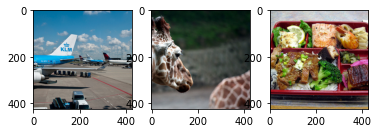

In [7]:
import matplotlib.pyplot as plt

print(train_betas.shape)
print(test_betas.shape) # dimensions of betas depend on the format selected, fsaverage is loaded here

print(len(train_captions)) # list of captions for each trial
print(len(test_captions))

print(train_imgs.shape)
print(test_imgs.shape)

trials = [42,43,44]

plt.figure()

for i in range(len(trials)):
    plt.subplot(131 + i)
    plt.imshow(train_imgs[i])
    print(train_captions[i])
plt.show()

Data can also be loaded in batches to save memory. This returns an iterator that loads one batch of data at a time:

In [8]:
batchdataloader = nsdl.load_batch_data(trialdata_train, batchsize=100, load_imgs=True)
b,c,i = batchdataloader.__next__()
print(f"betas: {b.shape}\ncaptions: {len(c)}\nimages: {i.shape}")

SESSION 1
loading annotations into memory...
Done (t=1.17s)
creating index...
index created!
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
SESSION 2
loading annotations into memory...
Done (t=1.16s)
creating index...
index created!
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
betas: (327684, 100)
captions: 100
images: (100, 425, 425, 3)
